## Exercise 27 
$\textit{Error propagation}$


In [158]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy

xsym, ysym = sy.symbols('x, y')
 
a_0 = 1.0 #mean value for a0
da_0 = 0.2 #std value for a0

a_1 = 1.0 #mean value for a1
da_1 = 0.2 #std value for a1

rho = -0.8 #correlation
cov= rho * da_0 * da_1 #formula for the covariance


a) Determine the result analytically both considering the correlation and neglecting the correlation.

In [163]:
y_0 = a_0 + a_1 * xsym #function
y_du = sy.sqrt((1*0.2)**2 +(xsym*0.2)**2) #uncertainty without correlation
y_u = y_0 + y_du

0.769415362466854

The uncertainty of y without any correlation between the variables can be determined with Gaussian uncertainty propagation and yields:$(1+x)\pm (0.2 \sqrt{x^2+1})$

In [160]:
y_wu = sy.sqrt((1*0.2)**2 +(xsym*0.2)**2 + 2*xsym*cov) #uncertainty with correlation

The uncertainty of y with correlation between the variables can be determined with another formula similiar to the Gaussian uncertainty propagation and yields:$(1+x)\pm (0.2 \sqrt{x^2+1-1,6x})$

b) Determine the result numerically with a Monte Carlo simulation. Visualise the parameters 𝑎0
and 𝑎1 in a scatter plot.

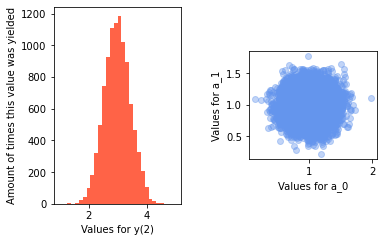

In [185]:
a_0 = np.random.normal(1, 0.2, 10000) #generating values for a0 and a1
a_1 = np.random.normal(1, 0.2, 10000)

def y(x):
    return a_0 + a_1*x

fig = plt.figure()

plt.subplot(1, 2, 1)

plt.hist(y(2), bins=30, range=[1, 5], color='tomato')
plt.xlabel("Values for y(2)")
plt.ylabel("Amount of times this value was yielded")

ax = fig.add_subplot(1, 2, 2)

plt.scatter(a_0,a_1, alpha=0.4, color='cornflowerblue')
plt.xlabel("Values for a_0")
plt.ylabel("Values for a_1")
ax.set_aspect('equal')

fig.tight_layout(pad=3.0)

c) Determine the predictions 𝑦 (mean and standard deviation) for fixed 𝑥 = −3, 0, +3 numerically
as well as analytically and compare them.

In [169]:
print(np.mean(y(-3)), np.std(y(-3)))
print(np.mean(y(0)), np.std(y(0)))
print(np.mean(y(3)), np.std(y(3)))

-2.005099799768287 0.6335581170378571
0.9960213151933976 0.1946453013197764
3.997142430155083 0.6316313329004327


The numerically determined values for $x=-3,0,+3$ are $y_{-3} = -2.0012182288424056 \pm 0.6135647725161408$, $y_{0} = 1.0085695846134246 \pm 0.18757527489848735$ and $y_{+3} = 4.018357398069256 \pm 0.610666549737587$. 

The analitically determined values for $x=-3,0,+3$ are $y_{-3} = -2 \pm 0.769415362466854 $, $y_{0} = 1 \pm 0,2$ and $y_{+3} = 4 \pm 0.456070170039655 $

The numerically determined values are all slightely bigger than the analitically calculated ones. But overall, they match up quiet good :)